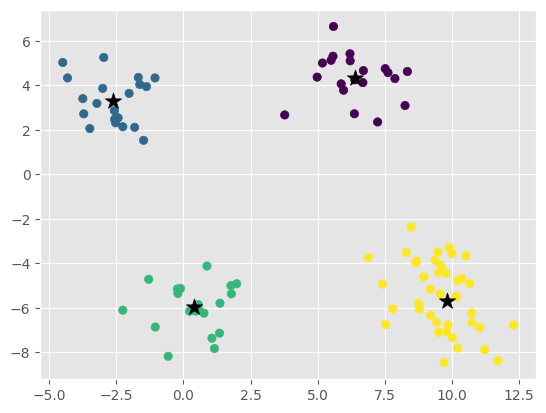

In [33]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets import make_blobs



X, y = make_blobs(n_samples=100, centers=5, n_features=2)
# X = np.array([[1, 2],
#               [1.5, 1.8],
#               [5, 8 ],
#               [8, 8],
#               [1, 0.6],
#               [9,11],
#               [8,2],
#               [10,2],
#               [9,3],])
threshold = 4
radius = 4
def getFate(X,pointFeatureSet,radius = radius,threshold = threshold):
    centroid = pointFeatureSet
    while True:
        in_bandWidth = []
        prevCentroid = centroid
        for featureSet in X:
            if np.linalg.norm(featureSet-pointFeatureSet) < radius:
                in_bandWidth.append(featureSet)

        centroid = np.average(in_bandWidth,axis=0)
        
        if np.linalg.norm(centroid-prevCentroid) < threshold:
            return centroid

def getCentroids(X):
    centroids = []
    for featureSet in X:
        centroid = getFate(X,featureSet)
        nearbyToKnown = False
        for centroid_ in centroids:
            if np.linalg.norm(centroid-centroid_) < threshold:
                nearbyToKnown = True
        if not nearbyToKnown:
            centroids.append(centroid)
    return centroids
def getLabels(X):
    centroids = getCentroids(X)
    labels = []
    for featureSet in X:
        fate = getFate(X,featureSet)
        mn = 10**9
        label = 0
        for i in range(len(centroids)):
            dist = np.linalg.norm(centroids[i]-fate)
            if dist < mn:
                mn = dist
                label = i
        labels.append(label)
    return labels

centroids = getCentroids(X)
labels = getLabels(X)


plt.scatter(X[:,0],X[:,1],c=labels)
for c in centroids:
    plt.scatter(c[0], c[1], color='k', marker='*', s=150)

plt.show()

In [45]:
import cv2
import numpy as np

# Define the RGB values
r, g, b = 125, 12, 80

# Convert to a numpy array in OpenCV's BGR format
bgr = np.array([[[b, g, r]]], dtype=np.uint8)

# Convert BGR to CIELUV color space
luv = cv2.cvtColor(bgr, cv2.COLOR_BGR2LUV)

# Extract the L, U, and V values from the LUV color space
l, u, v = luv[0][0]

# Print the L, U, and V values
print("L: ", l)
print("U: ", u)
print("V: ", v)


L:  69
U:  137
V:  119


In [44]:
import numpy as np

def rgb_to_luv(r, g, b):
    # Normalize RGB values to [0, 1] range
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    
    # Define transformation matrix for RGB to XYZ
    transform_mat = np.array([[0.412453, 0.357580, 0.180423],
                              [0.212671, 0.715160, 0.072169],
                              [0.019334, 0.119193, 0.950227]])
    
    # Apply RGB to XYZ transformation
    xyz = np.dot([r, g, b], transform_mat.T)
    
    # Define reference white point
    ref_white = np.array([0.950456, 1.0, 1.088754])
    
    # Calculate XYZ coordinates relative to reference white point
    xyz_ref_white = np.dot(ref_white, transform_mat.T)
    xyz = xyz / xyz_ref_white
    
    # Calculate L, u, and v values
    y = xyz[1]
    if y > 0.008856:
        y = np.power(y, 1.0/3.0)
    else:
        y = 7.787 * y + 16.0 / 116.0
    
    u_denom = np.sum(xyz)
    if u_denom != 0.0:
        u = 4.0 * xyz[0] / u_denom
    else:
        u = 0.0
    
    v_denom = np.sum(xyz)
    if v_denom != 0.0:
        v = 9.0 * xyz[1] / v_denom
    else:
        v = 0.0
    
    l = 116.0 * y - 16.0
    return (l, u, v)
rgb_to_luv(r,g,b)

(51.48396124819003, 1.3679785764161996, 3.076343103259424)

In [42]:
def rgb_to_luv(r, g, b):
    # Convert RGB to XYZ
    x = 0.412453 * r + 0.357580 * g + 0.180423 * b
    y = 0.212671 * r + 0.715160 * g + 0.072169 * b
    z = 0.019334 * r + 0.119193 * g + 0.950227 * b
    
    # Convert XYZ to LUV
    x_n = 0.95047   # Observer= 2°, Illuminant= D65
    y_n = 1.0
    z_n = 1.08883
    t = y / y_n
    
    if t > 0.008856:
        l = 116 * (t ** (1/3)) - 16
    else:
        l = 903.3 * t
    
    d = x + 15 * y + 3 * z
    u_prime = (4 * x) / d
    v_prime = (9 * y) / d
    
    u_n = (4 * x_n) / (x_n + 15 * y_n + 3 * z_n)
    v_n = (9 * y_n) / (x_n + 15 * y_n + 3 * z_n)
    
    u = 13 * l * (u_prime - u_n)
    v = 13 * l * (v_prime - v_n)
    
    return (l, u, v)
print(rgb_to_luv(50,50,50))

(411.34765384228484, -0.0022603563362229152, 0.03153888598564956)
